# **Part A** :- Uber fare price prediction


**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from math import *

**Importing Data**

In [2]:
df = pd.read_csv("dataset/uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
df.sample(10)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
193443,47807941,2011-03-03 11:09:39.0000006,9.3,2011-03-03 11:09:39 UTC,-73.969812,40.758001,-73.985588,40.754282,1
66376,31518082,2013-11-20 18:54:00.0000004,22.0,2013-11-20 18:54:00 UTC,-73.953770,40.766257,-73.997228,40.694177,6
15606,9236080,2010-11-29 08:39:00.000000189,5.7,2010-11-29 08:39:00 UTC,-73.955578,40.788118,-73.962638,40.775732,2
68626,19796654,2014-04-05 11:57:00.000000129,3.5,2014-04-05 11:57:00 UTC,-73.960043,40.770582,-73.956223,40.775770,5
89889,2247749,2011-08-14 17:59:37.0000001,45.0,2011-08-14 17:59:37 UTC,-73.964252,40.755582,-73.964294,40.755550,1
158589,26944758,2014-02-19 18:47:00.000000246,13.0,2014-02-19 18:47:00 UTC,-73.959485,40.763237,-73.941407,40.806960,1
84681,34160492,2011-02-06 18:33:00.00000039,18.1,2011-02-06 18:33:00 UTC,-73.991123,40.723962,-73.976717,40.790530,1
32729,18792792,2013-09-20 20:18:00.000000251,8.5,2013-09-20 20:18:00 UTC,-74.003952,40.738442,-73.987090,40.761777,1
11539,49992152,2013-06-28 19:02:00.000000190,11.0,2013-06-28 19:02:00 UTC,-73.992133,40.724010,-73.984487,40.711275,2
115685,6927826,2013-08-24 22:17:44.0000007,15.0,2013-08-24 22:17:44 UTC,-73.921312,40.743671,-73.963712,40.771723,1


# Exploratory data analysis

In [4]:
df.shape

(200000, 9)

**Checking for null values**

In [5]:
df.isnull()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

**Removing null values**

In [7]:
df = df.dropna()

**Here we have dropped a row containing null values**

In [8]:
df.shape

(199999, 9)

**Drop unnecessary columns**

In [9]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)

In [10]:
df.sample(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
100276,9.5,2014-03-30 19:39:00 UTC,-73.976367,40.751567,-74.005017,40.741317,1
43849,8.9,2012-01-02 20:21:36 UTC,-73.983834,40.744847,-73.953067,40.771798,1
153341,9.5,2014-03-27 18:39:39 UTC,-73.973325,40.763984,-73.983002,40.755225,3
85487,21.3,2010-12-11 19:54:43 UTC,-73.959327,40.763235,-73.983507,40.761435,1
7610,5.5,2013-06-12 20:04:19 UTC,-73.992393,40.724061,-74.005057,40.728623,4
146609,5.3,2012-02-01 00:51:00 UTC,-74.009146,40.725936,-74.015762,40.711645,1
155187,47.0,2013-09-21 03:09:52 UTC,-73.950837,40.723707,-73.877884,40.880713,1
193325,9.0,2013-07-28 12:25:00 UTC,-73.990792,40.730477,-73.991895,40.748892,5
192910,26.0,2013-08-20 08:39:00 UTC,-73.996267,40.662017,-74.008288,40.742190,1
188599,4.9,2010-09-13 22:01:17 UTC,-73.982093,40.775470,-73.960320,40.769570,1


**Calculating Distance**

In [11]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    Distance = []

    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        Distance.append(c)

    return Distance
df['Distance_km'] = distance_transform(df['pickup_longitude'].to_numpy(),
                                                df['pickup_latitude'].to_numpy(),
                                                df['dropoff_longitude'].to_numpy(),
                                                df['dropoff_latitude'].to_numpy()
                                              )
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance_km
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.850319
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.539715


**Identify and remove outliers**

In [12]:
locations=['pickup_latitude','pickup_longitude','dropoff_longitude','dropoff_latitude','fare_amount','Distance_km']

In [13]:
for i in locations:
    lower_limit = df[i].quantile(0.02)
    upper_limit = df[i].quantile(0.99)
    df = df[(df[i] >= lower_limit) & (df[i] <= upper_limit)]
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance_km
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...,...,...
199993,9.5,2012-09-29 19:51:27 UTC,-73.987798,40.721210,-73.980960,40.744388,1,2.640893
199994,12.0,2014-01-31 14:42:00 UTC,-73.983070,40.760770,-73.972972,40.754177,1,1.122878
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.539715


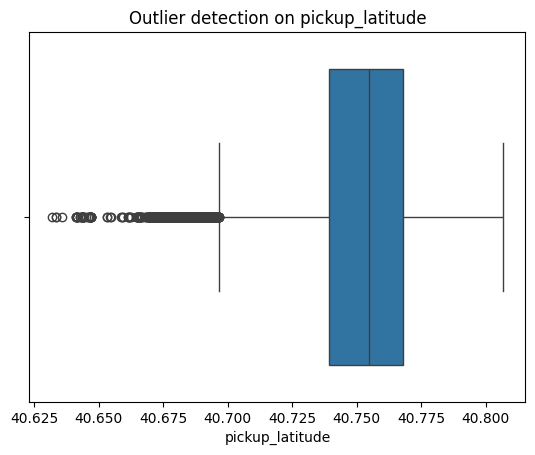

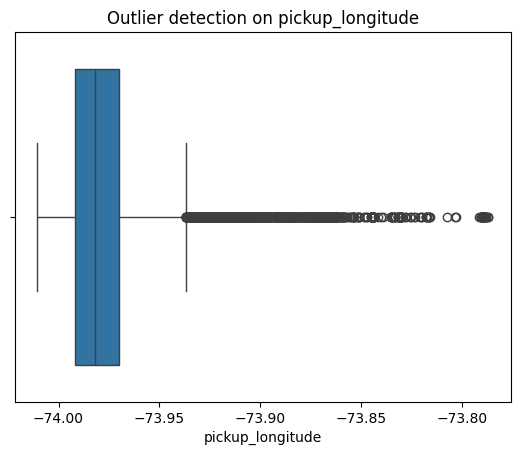

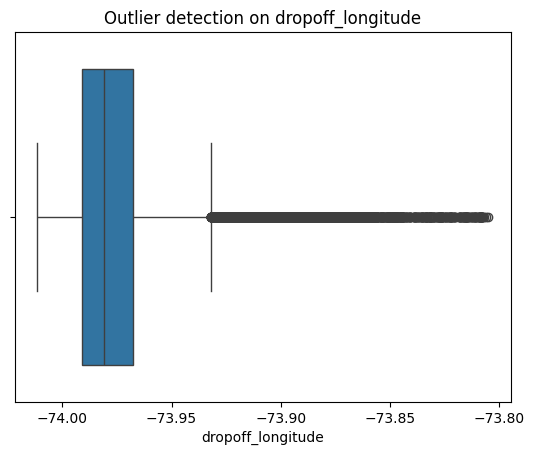

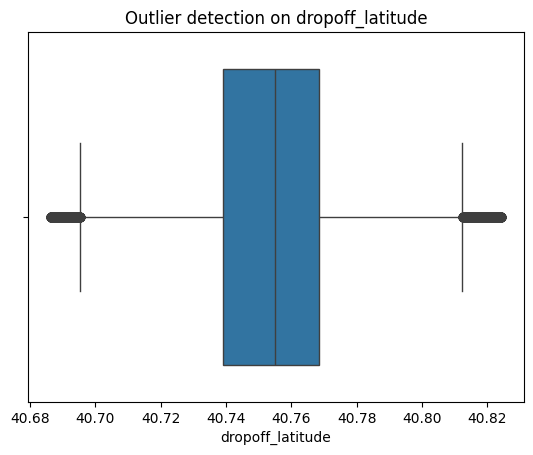

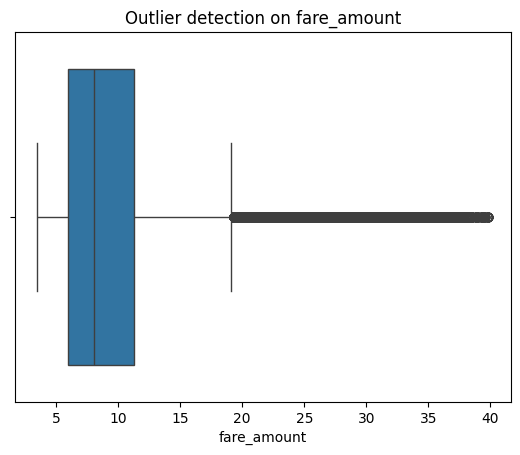

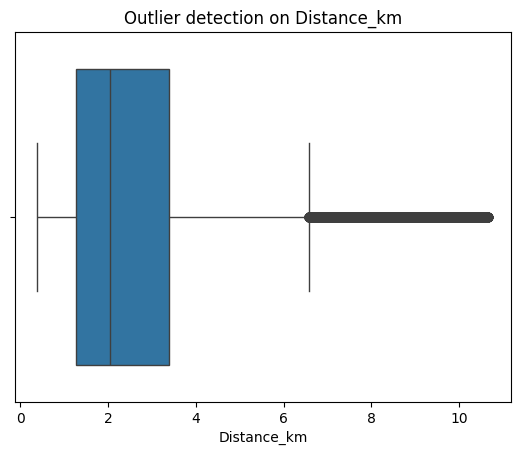

In [14]:
# Boxplot analysis
def box_plot(params):
    for i in params:
        sns.boxplot(x = df[i])
        plt.title(f'Outlier detection on {i}')
        plt.show()
box_plot(locations)

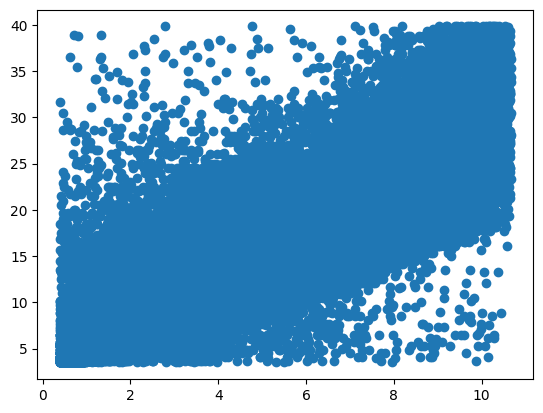

In [15]:
plt.scatter(df['Distance_km'],df['fare_amount'])

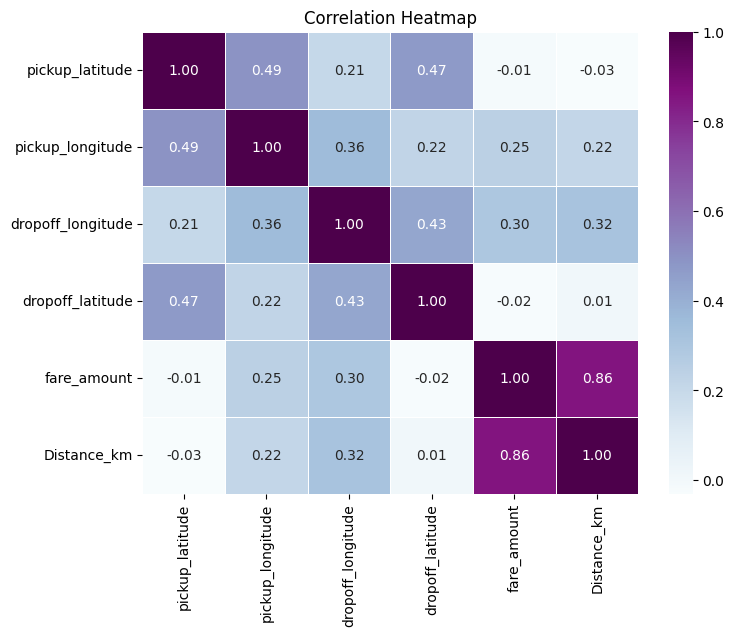

In [16]:
corr = df[locations].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='BuPu', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

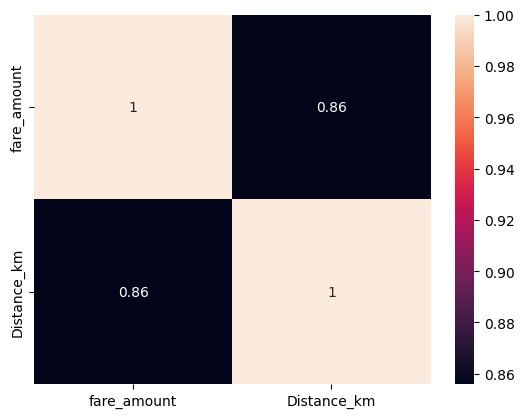

In [17]:
correlation = df[['fare_amount','Distance_km']].corr()
sns.heatmap(correlation,annot=True)

**Splitting data into training and testing sets**

In [18]:
X = df['Distance_km'].values.reshape(-1, 1)

In [19]:
y = df['fare_amount'].values.reshape(-1, 1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear regression**

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

**Ridge Regression**

In [22]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

Ridge()

**Lasso Regression**

In [24]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

**Evaluating the models**

In [25]:
models = {'Linear Regression': lin_reg, 'Ridge Regression': ridge_reg, 'Lasso Regression': lasso_reg}

In [26]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name}: R2 = {r2:.4f}, RMSE = {rmse:.4f}")

Linear Regression: R2 = 0.7313, RMSE = 2.7913
Ridge Regression: R2 = 0.7313, RMSE = 2.7913
Lasso Regression: R2 = 0.7314, RMSE = 2.7911


All three models (Linear, Ridge, and Lasso Regression) show similar performance with R2 around 0.731 and RMSE close to 2.791.